# Pharmaceutical Analysis

## Overview

Analysis was conducted to determine the effectiveness of a potentiat treatment drug for SCC (squamous cell carcinoma). Study involved 249 mice (248 after cleaning data) with SCC tumor growths that were either given the drug-of-interest (Capomulin), one of 8 competitor drugs, or a placebo. Tumor growth and number of metastic sites were measured over 45 days.

## Observations and Insights 

TBD

## Analysis

Code is in python and uses the following libraries: pandas, numpy, scipy, and matplotlib

In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Display mouse dataframe 5 rows

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Display study dataframe 5 rows

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Left join merge of datasets on Mouse ID column

mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display merged dataframe 5 rows

mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Confirm count of unique mice in study

print(f'Number of mice: {mouse_study_df["Mouse ID"].nunique()}')


Number of mice: 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

duplicate_mice_time = mouse_study_df.loc[
    mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

print(f"Number of duplicates found: {len(duplicate_mice_time)}")
print(f"ID of mouse with duplicate timepoints: {duplicate_mice_time[0]}")


Number of duplicates found: 1
ID of mouse with duplicate timepoints: g989


In [7]:
# Get all the data for the duplicate mouse ID

duplicate_mouse_df = mouse_study_clean = mouse_study_df.loc[
    mouse_study_df["Mouse ID"] == (duplicate_mice_time[0]), :]

# Display duplicate dataframe 5 rows
duplicate_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [8]:
# Filter dataframe to exclude mouse id equal to "duplicate_mice_time"

mouse_study_clean = mouse_study_df.loc[
    mouse_study_df["Mouse ID"] != (duplicate_mice_time[0]), :]

# Display cleaned dataframe 5 rows
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Confirm dropped 1 mouse ID by checking unique counts again

print(f'Number of mice after cleaning: {mouse_study_clean["Mouse ID"].nunique()}')

Number of mice after cleaning: 248


## Summary Statistics

In [34]:
# Dataframe grouped by Drug Regimen column
treatment_groups = mouse_study_clean.groupby("Drug Regimen")


# Series of tumor volume by treatment groups
treatment = treatment_groups["Tumor Volume (mm3)"]


# Variables for statistics
mean_treatment = treatment.mean()
median_treatment = treatment.median()
var_treatment = treatment.var()
sd_treatment = treatment.std()
sem_treatment = treatment.sem()


# Summary dataframe of statistic variables
stat_summary_df = pd.DataFrame({
    "Mean":mean_treatment,
    "Median":median_treatment,
    "Variance":var_treatment,
    "Standard Deviation":sd_treatment,
    "SEM":sem_treatment
})

# Display summary dataframe
stat_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Summary statistics using aggregation method 

# Dataframe containing only drug regimen and tumor volume columns
mouse_study_small = mouse_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]


# Group by drug regimen, and aggregate statistics on tumor volume
mouse_study_small.groupby("Drug Regimen").agg([
    np.mean, np.median, np.var, np.std, sts.sem])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [50]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Bar plot - pandas method



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

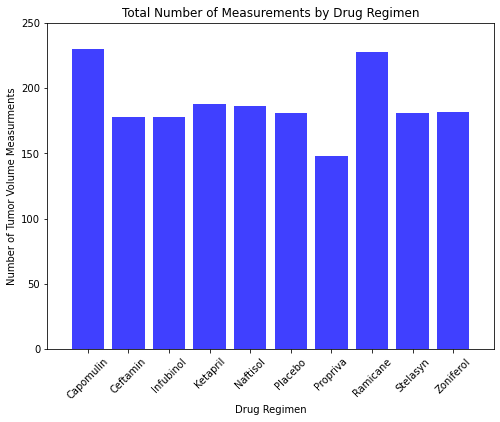

In [101]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


# Bar plot - pyplot method


# Set y-axis to count of measurements by treatment group
y_axis = treatment_groups["Tumor Volume (mm3)"].count()

# Set x-axis to array based on number of unique values in Drug Regimen column
x_axis = np.arange(mouse_study_clean["Drug Regimen"].nunique())

# Set labels equal to unique values in Drug Regimen

labels = y_axis.keys()

# tick locations (convert array to list using list comprehension)
tick_locations = [value for value in x_axis]

# Chart bar plot
plt.figure(figsize=(8,6))
plt.bar(x_axis, y_axis, color="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, labels, rotation=45)

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis) + 20)

# Set labels
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tumor Volume Measurments")

# show plot
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


# Pie chart - pandas method

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Pie chart - pandas method

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
